# `Getting started...`

In [ ]:
# Import Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Upload dataset
df = pd.read_csv('ORDERS.csv')

df.head(5)

,OrderId,OrderDate,CustomerID,ProductID,PurchaseAmount,StoreID,OrderStatusID
0,1,03.01.2021,20,1,9,2,1
1,2,03.01.2021,77,2,9,4,1
2,3,04.01.2021,27,3,6,5,1
3,4,05.01.2021,62,4,3,4,1
4,5,07.01.2021,30,5,10,2,1


In [ ]:
# Checking data
df.describe()

,OrderId,CustomerID,ProductID,PurchaseAmount,StoreID,OrderStatusID
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,500.000000,50.478478,13.385385,5.576577,3.034034,1.047047
std,288.530761,28.517675,7.176464,2.884186,1.408122,0.266328
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.500000,27.000000,7.000000,3.000000,2.000000,1.000000
50%,500.000000,51.000000,14.000000,6.000000,3.000000,1.000000
75%,749.500000,75.000000,20.000000,8.000000,4.000000,1.000000
max,999.000000,100.000000,25.000000,10.000000,5.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderId         999 non-null    int64 
 1   OrderDate       999 non-null    object
 2   CustomerID      999 non-null    int64 
 3   ProductID       999 non-null    int64 
 4   PurchaseAmount  999 non-null    int64 
 5   StoreID         999 non-null    int64 
 6   OrderStatusID   999 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


# `Exploratory Data Analysis [Visualizations]`

<ipython-input-64-d2e26392e637>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['OrderDate'] = pd.to_datetime(df['OrderDate'])


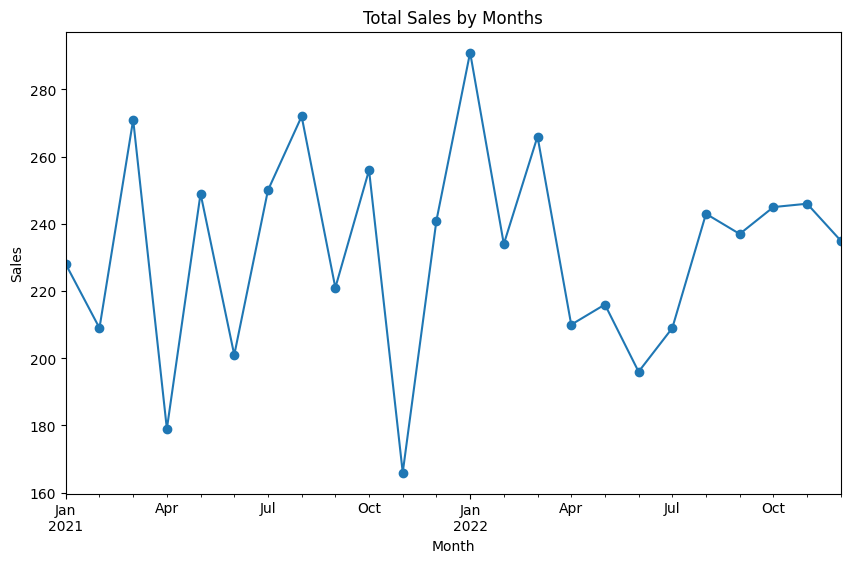

In [ ]:
# 1. Total Sales by Months
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Month'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['PurchaseAmount'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales by Months')
plt.show()

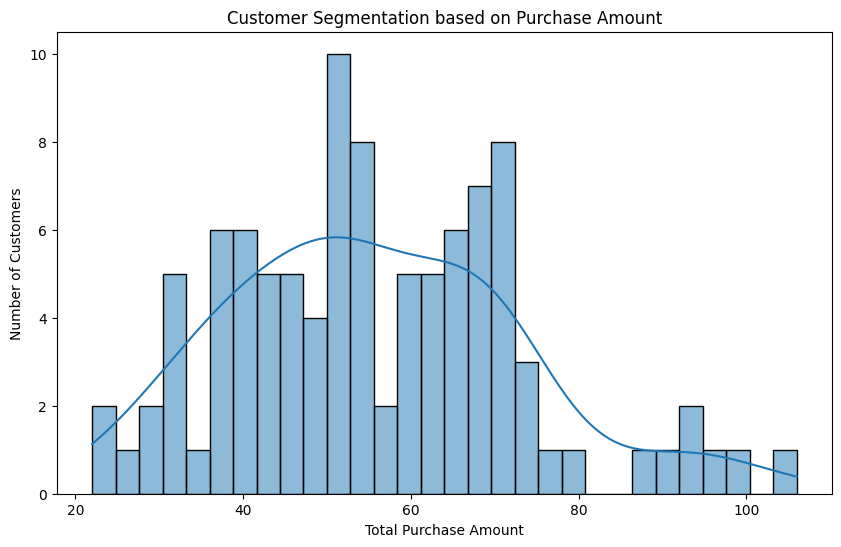

In [ ]:
# 2. Customer Segmentation [Number of customers Total purchases]
customer_segmentation = df.groupby('CustomerID')['PurchaseAmount'].sum()
plt.figure(figsize=(10, 6))
sns.histplot(customer_segmentation, bins=30, kde=True)
plt.xlabel('Total Purchase Amount')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation based on Purchase Amount')
plt.show()

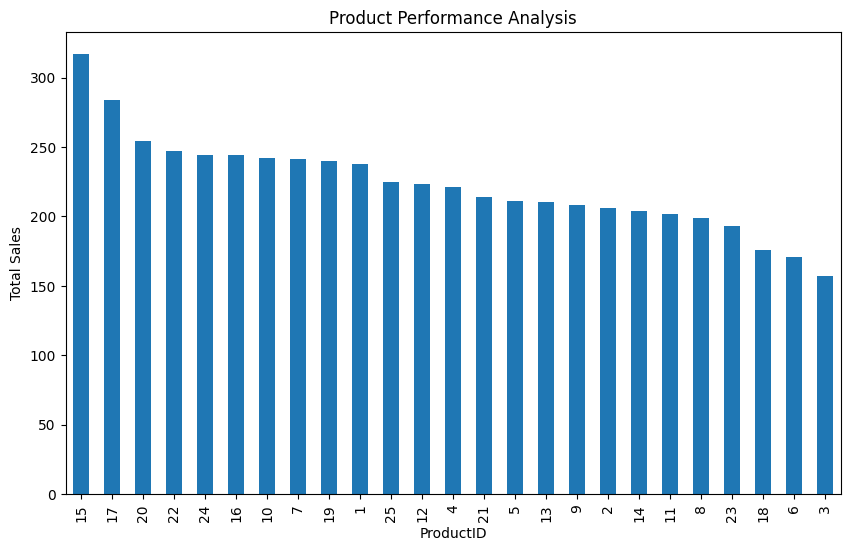

In [ ]:
# 3. Product Performance Analysis
product_performance = df.groupby('ProductID')['PurchaseAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_performance.plot(kind='bar')
plt.xlabel('ProductID')
plt.ylabel('Total Sales')
plt.title('Product Performance Analysis')
plt.show()

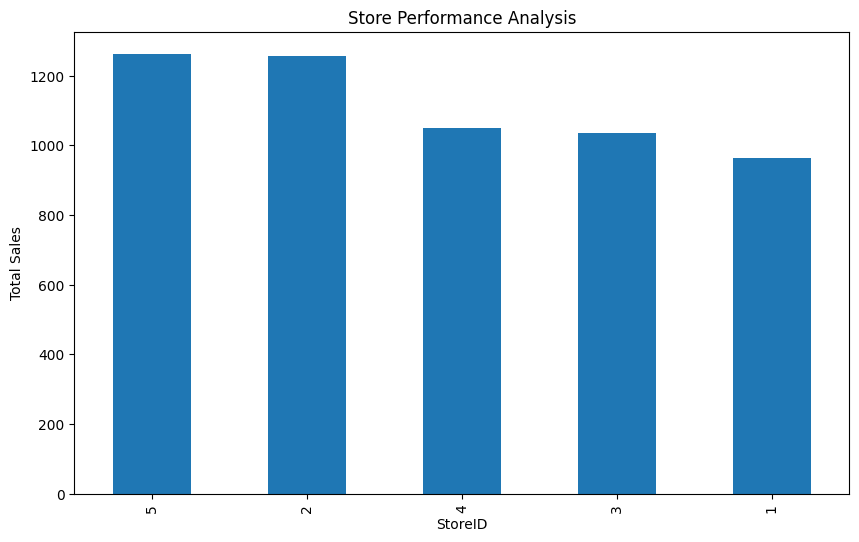

In [ ]:
# 4. Store Performance Analysis
store_performance = df.groupby('StoreID')['PurchaseAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
store_performance.plot(kind='bar')
plt.xlabel('StoreID')
plt.ylabel('Total Sales')
plt.title('Store Performance Analysis')
plt.show()

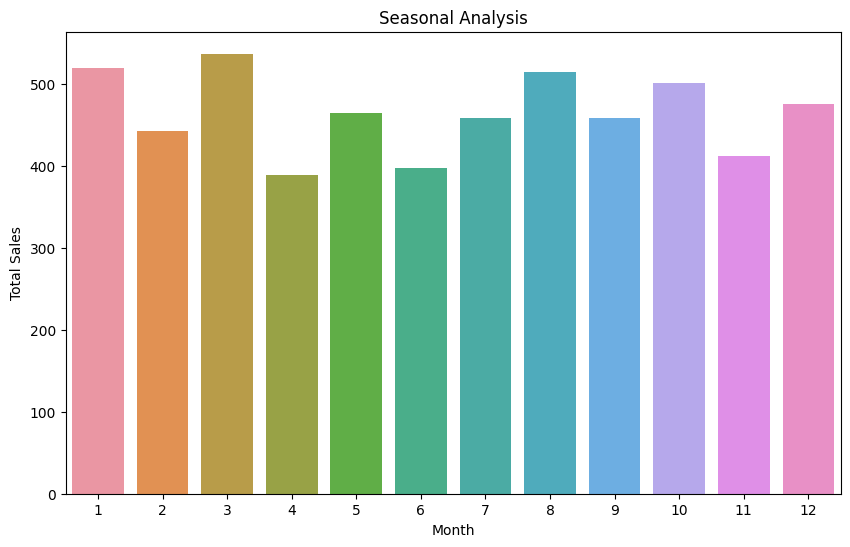

In [ ]:
# 5. Seasonal Analysis
df['Month'] = df['OrderDate'].dt.month
seasonal_analysis = df.groupby('Month')['PurchaseAmount'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_analysis.index, y=seasonal_analysis.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Seasonal Analysis')
plt.show()

# `Purchase Amount Prediction [ML Model Training & Testing]`

In [ ]:
# Splitting Training set & Testing set
X = df[['CustomerID', 'ProductID', 'StoreID', 'OrderStatusID']]
y = df['PurchaseAmount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Model Testing
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (Coefficient of Determination): {r2}')

Mean Squared Error: 8.456254154926285
R-squared (Coefficient of Determination): -0.018776704125859522


In [ ]:
# Download Model
pickle.dump(model, open('best_model.pkl', 'wb'))